In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt
import scipy.stats as stats

# Load data
data = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

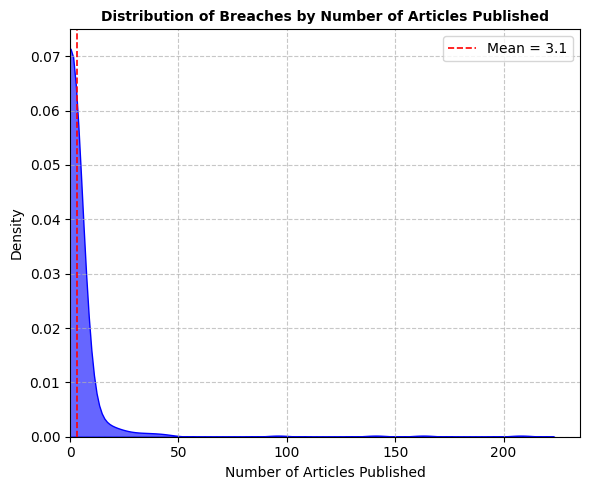

In [7]:
# Filter out rows with negative article counts
breach_summary = data.groupby('ID').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',    # Count unique headlines (number of articles)
    'sector': 'first',      # Sector of the breach
    'data sensitivity': 'first',  # Sensitivity level
}).rename(columns={'Headline': 'article_count'})

breach_summary = breach_summary.reset_index()

# Remove breaches with negative article counts (if any)
breach_summary = breach_summary[breach_summary['article_count'] >= 0]

# Plot density of articles published for all breaches
plt.figure(figsize=(6, 5))

# Use kdeplot for density
sns.kdeplot(
    data=breach_summary,
    x='article_count',
    fill=True,
    color='blue',
    alpha=0.6,
)

# Add vertical line for the mean article count
mean_articles = breach_summary['article_count'].mean()
plt.axvline(mean_articles, color='red', linestyle='--', linewidth=1.2, label=f'Mean = {mean_articles:.1f}')

# Customize plot
plt.title('Distribution of Breaches by Number of Articles Published', fontsize=10, fontweight='bold')
plt.xlabel('Number of Articles Published', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Add x-axis limits to focus on valid range
plt.xlim(left=0)

# Add legend for mean line
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

plt.close()

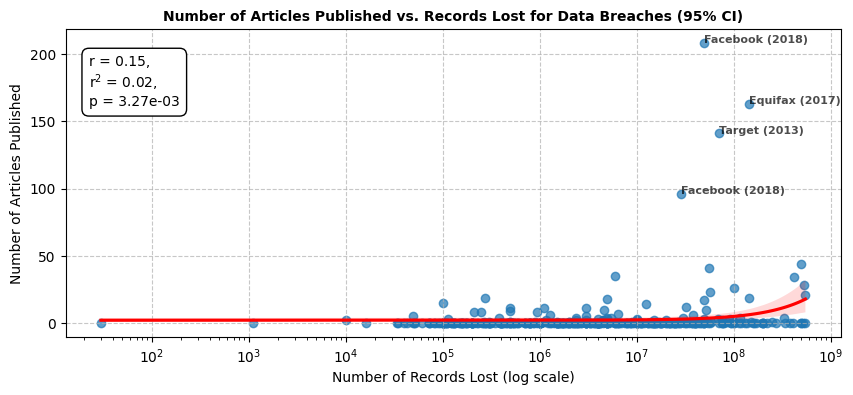

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

# Load data
data = pd.read_csv(
    "../../data/article_company_breach/left_joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

# Prepare data for plotting
individual_breaches = data.groupby('ID').agg({
    'organisation': 'first',       # Company name
    'year': 'first',               # Year of breach
    'records lost': 'first',       # Records lost
    'Headline': 'count',            # Count of articles (number of headlines)
    'sector': 'first'
}).reset_index()

# Rename columns for clarity
individual_breaches.rename(columns={'Headline': 'Article Count'}, inplace=True)

from scipy.stats import pearsonr, linregress

# Calculate correlation coefficient and regression parameters
correlation, _ = pearsonr(individual_breaches['records lost'], individual_breaches['Article Count'])
slope, intercept, rvalue, pvalue, stderr = linregress(
    individual_breaches['records lost'], 
    individual_breaches['Article Count']
)

# Plot scatter with regression line
plt.figure(figsize=(10, 4))
sns.regplot(
    data=individual_breaches, 
    x='records lost', 
    y='Article Count',
    scatter_kws={'alpha': 0.7}, 
    line_kws={'color': 'red'}
)

plt.xscale('log')

for i, row in individual_breaches.iterrows():
    if(row['Article Count'] > 45):
        plt.text(
            x=row['records lost'], 
            y=row['Article Count'], 
            s=f"{row['organisation']} ({row['year']})", 
            fontsize=8, alpha=0.7,
            fontweight='bold'
        )

plt.title('Number of Articles Published vs. Records Lost for Data Breaches (95% CI)', fontsize=10, fontweight='bold')
plt.xlabel('Number of Records Lost (log scale)', fontsize=10)
plt.ylabel('Number of Articles Published', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.annotate(
    f'r = {correlation:.2f},\nr$^2$ = {rvalue**2:.2f},\np = {pvalue:.2e}', 
    xy=(0.03, 0.75), xycoords='axes fraction',
    fontsize=10, color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.show()


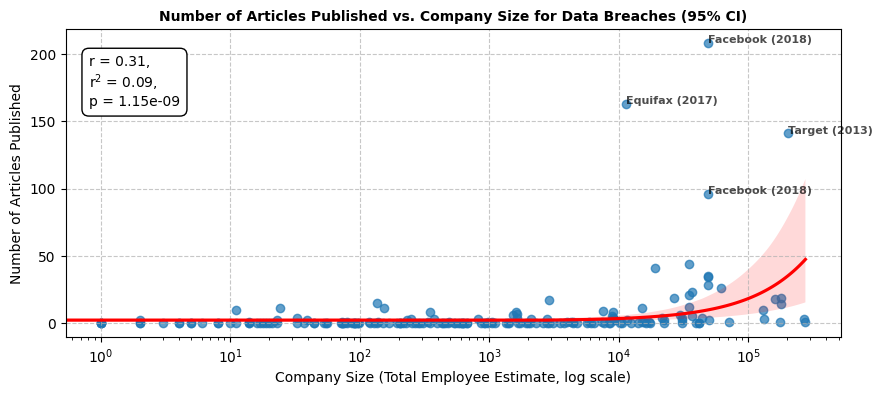

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

data = pd.read_csv(
    "../../data/article_company_breach/left_joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

individual_breaches = data.groupby('ID').agg({
    'organisation': 'first',      
    'year': 'first',              
    'Headline': 'count',           
    'sector': 'first',
    'total employee estimate': 'first'
}).reset_index()

individual_breaches.rename(columns={'Headline': 'Article Count'}, inplace=True)

from scipy.stats import pearsonr, linregress

correlation, _ = pearsonr(individual_breaches['total employee estimate'], individual_breaches['Article Count'])
slope, intercept, rvalue, pvalue, stderr = linregress(
    individual_breaches['total employee estimate'], 
    individual_breaches['Article Count']
)

plt.figure(figsize=(10, 4))
sns.regplot(
    data=individual_breaches, 
    x='total employee estimate', 
    y='Article Count',
    scatter_kws={'alpha': 0.7}, 
    line_kws={'color': 'red'}
)

plt.xscale('log')

for i, row in individual_breaches.iterrows():
    if(row['Article Count'] > 45):
        plt.text(
            x=row['total employee estimate'], 
            y=row['Article Count'], 
            s=f"{row['organisation']} ({row['year']})", 
            fontsize=8, alpha=0.7,
            fontweight='bold'
        )

plt.title('Number of Articles Published vs. Company Size for Data Breaches (95% CI)', fontsize=10, fontweight='bold')
plt.xlabel('Company Size (Total Employee Estimate, log scale)', fontsize=10)
plt.ylabel('Number of Articles Published', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.annotate(
    f'r = {correlation:.2f},\nr$^2$ = {rvalue**2:.2f},\np = {pvalue:.2e}', 
    xy=(0.03, 0.75), xycoords='axes fraction',
    fontsize=10, color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.show()


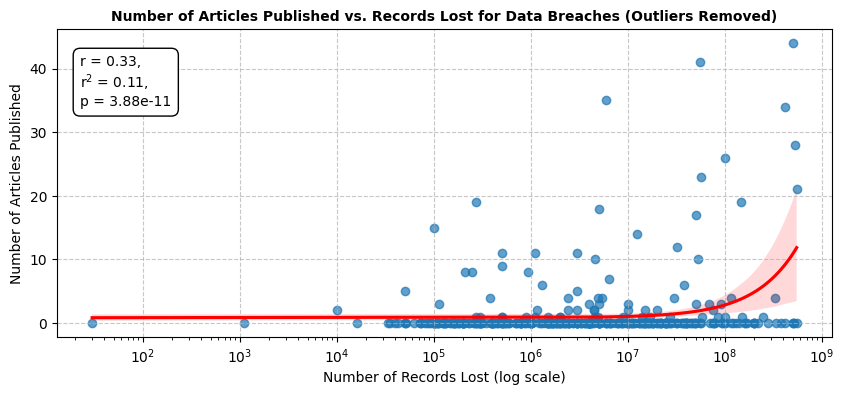

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

data = pd.read_csv(
    "../../data/article_company_breach/left_joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

individual_breaches = data.groupby('ID').agg({
    'organisation': 'first',      
    'year': 'first',               
    'records lost': 'first',       
    'Headline': 'count',           
    'sector': 'first'
}).reset_index()

individual_breaches.rename(columns={'Headline': 'Article Count'}, inplace=True)

out = [290, 234, 122, 261]
individual_breaches = individual_breaches[~individual_breaches['ID'].isin(out)]

from scipy.stats import pearsonr, linregress

correlation, _ = pearsonr(individual_breaches['records lost'], individual_breaches['Article Count'])
slope, intercept, rvalue, pvalue, stderr = linregress(
    individual_breaches['records lost'], 
    individual_breaches['Article Count']
)

plt.figure(figsize=(10, 4))
sns.regplot(
    data=individual_breaches, 
    x='records lost', 
    y='Article Count',
    scatter_kws={'alpha': 0.7}, 
    line_kws={'color': 'red'}
)

plt.xscale('log')

for i, row in individual_breaches.iterrows():
    if(row['Article Count'] > 45):
        plt.text(
            x=row['records lost'], 
            y=row['Article Count'], 
            s=f"{row['organisation']} ({row['year']}) {row['ID']}", 
            fontsize=8, alpha=0.7
        )

plt.title('Number of Articles Published vs. Records Lost for Data Breaches (Outliers Removed)', fontsize=10, fontweight='bold')
plt.xlabel('Number of Records Lost (log scale)', fontsize=10)
plt.ylabel('Number of Articles Published', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.annotate(
    f'r = {correlation:.2f},\nr$^2$ = {rvalue**2:.2f},\np = {pvalue:.2e}', 
    xy=(0.03, 0.75), xycoords='axes fraction',
    fontsize=10, color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.show()


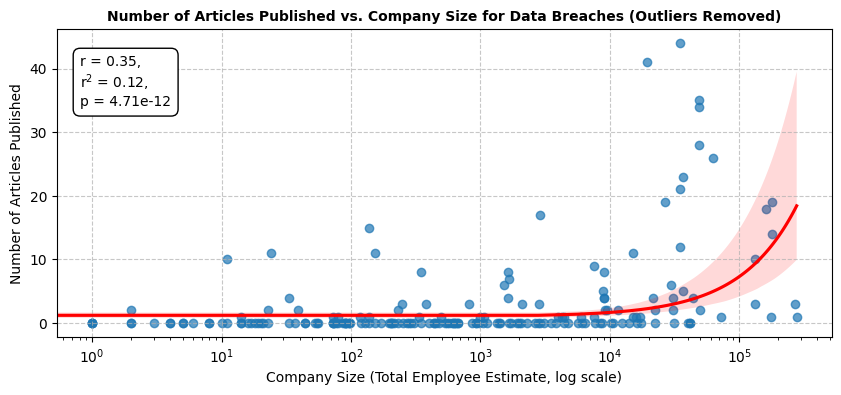

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

data = pd.read_csv(
    "../../data/article_company_breach/left_joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

individual_breaches = data.groupby('ID').agg({
    'organisation': 'first',
    'year': 'first',
    'Headline': 'count',
    'sector': 'first',
    'total employee estimate': 'first'
}).reset_index()

individual_breaches.rename(columns={'Headline': 'Article Count'}, inplace=True)

out = [290, 234, 122, 261]
individual_breaches = individual_breaches[~individual_breaches['ID'].isin(out)]

from scipy.stats import pearsonr, linregress

correlation, _ = pearsonr(individual_breaches['total employee estimate'], individual_breaches['Article Count'])
slope, intercept, rvalue, pvalue, stderr = linregress(
    individual_breaches['total employee estimate'], 
    individual_breaches['Article Count']
)

plt.figure(figsize=(10, 4))
sns.regplot(
    data=individual_breaches, 
    x='total employee estimate', 
    y='Article Count',
    scatter_kws={'alpha': 0.7}, 
    line_kws={'color': 'red'}
)

plt.xscale('log')

for i, row in individual_breaches.iterrows():
    if(row['Article Count'] > 45):
        plt.text(
            x=row['total employee estimate'], 
            y=row['Article Count'], 
            s=f"{row['organisation']} ({row['year']})", 
            fontsize=8, alpha=0.7,
            fontweight='bold'
        )

plt.title('Number of Articles Published vs. Company Size for Data Breaches (Outliers Removed)', fontsize=10, fontweight='bold')
plt.xlabel('Company Size (Total Employee Estimate, log scale)', fontsize=10)
plt.ylabel('Number of Articles Published', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.annotate(
    f'r = {correlation:.2f},\nr$^2$ = {rvalue**2:.2f},\np = {pvalue:.2e}', 
    xy=(0.03, 0.75), xycoords='axes fraction',
    fontsize=10, color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.show()
